FloatSlider(value=500.0, description='Vel. ✈️ (m/s):', max=667.0, min=10.0, step=10.0)

FloatSlider(value=10.0, description='Alt. ✈️ (m):', max=500.0, min=10.0, step=10.0)

FloatSlider(value=10.0, description='Dist al pico (m):', max=500.0, step=10.0)

FloatSlider(value=80.0, description='Alt. 🏔️ (m):', max=500.0, min=10.0, step=10.0)

FloatSlider(value=45.0, description='Ángulo (grados):', max=70.0, min=25.0, step=1.0)

Ajuste: La distancia al pico se ha cambiado a 90.00 m para evitar que el avión esté dentro de la montaña.


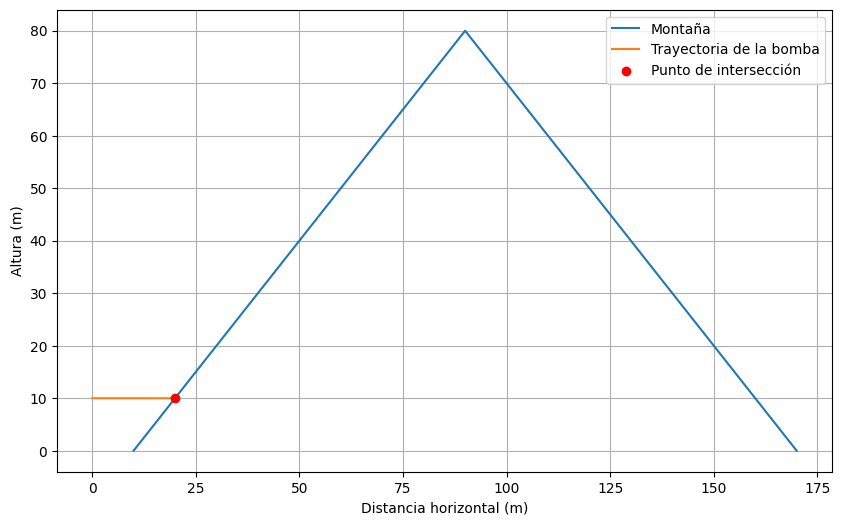

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Constantes
g = 9.81  # Aceleración debida a la gravedad en m/s^2

# Función para calcular la trayectoria de la bomba
def calcular_trayectoria(v0, ha, d, hm, alpha):
    alpha_rad = np.radians(alpha)

    # Tiempo de impacto con el eje x
    t_impacto_x = np.sqrt(2 * ha / g)
    x_impacto_x = v0 * t_impacto_x

    # Coordenadas de la montaña
    montaña_x = [d - hm / np.tan(alpha_rad), d, d + hm / np.tan(alpha_rad)]
    montaña_y = [0, hm, 0]

    # Función lineal de la montaña
    def montaña(x):
        if montaña_x[0] <= x <= montaña_x[1]:
            return (hm / (d - montaña_x[0])) * (x - montaña_x[0])
        elif montaña_x[1] < x <= montaña_x[2]:
            return hm - (hm / (montaña_x[2] - d)) * (x - d)
        else:
            return -1  # Valor que nunca se alcanzará si está fuera de los límites de la montaña

    # Encontrar la intersección con la montaña
    t_vals = np.linspace(0, t_impacto_x, num=500)
    x_vals = v0 * t_vals
    y_vals = ha - 0.5 * g * t_vals**2

    interseccion_x = x_impacto_x
    interseccion_y = 0
    for t, x, y in zip(t_vals, x_vals, y_vals):
        if y <= montaña(x):
            interseccion_x = x
            interseccion_y = y
            break

    # Ajustar la trayectoria hasta la intersección
    t_impacto = t_vals[np.where(x_vals == interseccion_x)][0]
    t = np.linspace(0, t_impacto, num=500)
    x = v0 * t
    y = ha - 0.5 * g * t**2

    return x, y, interseccion_x, interseccion_y, montaña_x, montaña_y

# Función para graficar la montaña y la trayectoria de la bomba
def graficar_trayectoria(v0, ha, d, hm, alpha):
    # Verificar y ajustar los parámetros si el avión está dentro de la montaña
    alpha_rad = np.radians(alpha)
    montaña_base = hm / np.tan(alpha_rad)
    
    if ha <= hm and d <= montaña_base:
        # Ajustar la distancia del avión al pico para que esté fuera de la montaña
        d = np.sign(d) * (montaña_base + 10)  # Colocar el avión 10 metros fuera de la montaña
        print(f"Ajuste: La distancia al pico se ha cambiado a {d:.2f} m para evitar que el avión esté dentro de la montaña.")

    if(d == 0 and ha < hm):
        d = montaña_base + 10
    x, y, interseccion_x, interseccion_y, montaña_x, montaña_y = calcular_trayectoria(v0, ha, d, hm, alpha)

    plt.figure(figsize=(10, 6))
    plt.plot(montaña_x, montaña_y, label='Montaña')
    plt.plot(x, y, label='Trayectoria de la bomba')
    plt.scatter([interseccion_x], [interseccion_y], color='red', zorder=5, label='Punto de intersección')
    plt.xlabel('Distancia horizontal (m)')
    plt.ylabel('Altura (m)')
    plt.legend()
    plt.grid()
    plt.show()

# Crear sliders para los parámetros
v0_slider = widgets.FloatSlider(value=100, min=10, max=667, step=10, description='Vel. ✈️ (m/s):')
ha_slider = widgets.FloatSlider(value=80, min=10, max=500, step=10, description='Alt. ✈️ (m):')
d_slider = widgets.FloatSlider(value=50, min=0, max=500, step=10, description='Dist al pico (m):')
hm_slider = widgets.FloatSlider(value=80, min=10, max=500, step=10, description='Alt. 🏔️ (m):')
alpha_slider = widgets.FloatSlider(value=60, min=25, max=70, step=1, description='Ángulo (grados):')

# Función que se llama cuando se actualiza cualquier slider
def update_plot(change):
    v0 = v0_slider.value
    ha = ha_slider.value
    d = d_slider.value
    hm = hm_slider.value
    alpha = alpha_slider.value
    clear_output(wait=True)
    display(v0_slider, ha_slider, d_slider, hm_slider, alpha_slider)
    graficar_trayectoria(v0, ha, d, hm, alpha)

# Conectar sliders con la función de actualización de la gráfica
v0_slider.observe(update_plot, names='value')
ha_slider.observe(update_plot, names='value')
d_slider.observe(update_plot, names='value')
hm_slider.observe(update_plot, names='value')
alpha_slider.observe(update_plot, names='value')

# Mostrar sliders y la gráfica inicial
display(v0_slider, ha_slider, d_slider, hm_slider, alpha_slider)
update_plot(None)
